# Modelo 4: Support Vector Machine (SVM) para Regresión

Este notebook implementa un modelo de regresión usando Support Vector Machine (SVM) para predecir el rendimiento en Rainbow Six Siege.

In [11]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import time

import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import xgboost as xgb


In [12]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [14]:
# Cargar dataset preparado desde el catálogo de Kedro
data_r5 = catalog.load("data_final")


[10/22/25 14:56:24] INFO     Loading data from data_final (CSVDataset)...                      ]8;id=262287;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=390697;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [15]:
# Preparar X e y
X = data_r5[[
    'gamemode',        # tipo de partida
    'winrole',         # atacante o defensor
    'endroundreason',  # cómo terminó la ronda
    'roundduration',   # cuánto duró
    'isdead',          # si el jugador murió
    'nbkills',]]       # número de eliminaciones

y = data_r5['impact_score']


In [16]:
# ===============================================
# 🔹 XGBoost Regresión - Plantilla Rápida Colab
# ===============================================

# Instalar XGBoost si no está


# Importaciones



# 2️⃣ Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3️⃣ Escalado (opcional, XGBoost no lo necesita pero puede ayudar)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4️⃣ Crear modelo XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=300,      # cantidad de árboles
    max_depth=6,           # profundidad máxima
    learning_rate=0.1,     # tasa de aprendizaje
    subsample=0.8,         # muestra aleatoria de filas por árbol
    colsample_bytree=0.8,  # muestra aleatoria de columnas por árbol
    random_state=42,
    n_jobs=-1              # usar todos los núcleos
)

# 5️⃣ Entrenamiento
start = time.time()
xgb_model.fit(X_train_scaled, y_train)
end = time.time()
print(f"\n✅ Entrenamiento completado en {end - start:.2f} segundos")

# 6️⃣ Predicciones
y_pred = xgb_model.predict(X_test_scaled)

# 7️⃣ Evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📊 MAE:  {mae:.4f}")
print(f"📊 MSE:  {mse:.4f}")
print(f"📊 RMSE: {rmse:.4f}")
print(f"📊 R2:   {r2:.4f}")



✅ Entrenamiento completado en 2.37 segundos
📊 MAE:  0.1640
📊 MSE:  0.1253
📊 RMSE: 0.3540
📊 R2:   0.7948


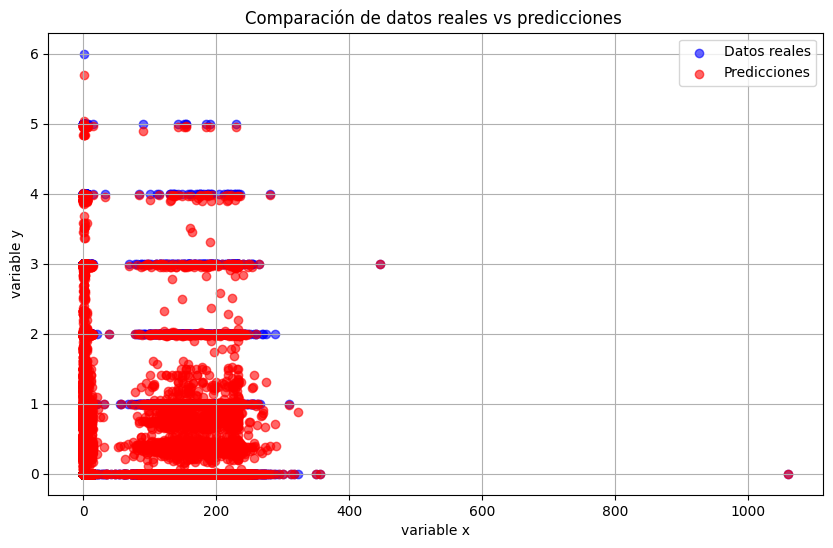

In [26]:
from matplotlib import pyplot as plt


# Asegurarse de que todos tengan la misma longitud
# Convertir a arrays planos
X_plot = np.array(X_test).reshape(-1)
y_test_plot = np.array(y_test).reshape(-1)
y_pred_plot = np.array(y_pred).reshape(-1)

# Verificar que tengan la misma longitud
min_len = min(len(X_plot), len(y_test_plot), len(y_pred_plot))
X_plot = X_plot[:min_len]
y_test_plot = y_test_plot[:min_len]
y_pred_plot = y_pred_plot[:min_len]

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(X_plot, y_test_plot, color='blue', label='Datos reales', alpha=0.6)
plt.scatter(X_plot, y_pred_plot, color='red', label='Predicciones', alpha=0.6)

plt.xlabel('variable x')
plt.ylabel('variable y')
plt.title('Comparación de datos reales vs predicciones ')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
# 5️⃣ Definir Grid de hiperparámetros (pequeño para no demorar demasiado)
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# 6️⃣ GridSearchCV
grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,               # validación cruzada de 3 folds
    scoring='r2',       # métrica para optimizar
    n_jobs=-1,
    verbose=1
)

# 7️⃣ Entrenamiento
start = time.time()
grid.fit(X_train_scaled, y_train)
end = time.time()

print(f"\n✅ GridSearch completado en {end - start:.2f} segundos")
print(f"📊 Mejor combinación de parámetros: {grid.best_params_}")

# 8️⃣ Predicciones con mejor modelo
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# 9️⃣ Evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 MAE:  {mae:.4f}")
print(f"📊 MSE:  {mse:.4f}")
print(f"📊 RMSE: {rmse:.4f}")
print(f"📊 R2:   {r2:.4f}")

Fitting 3 folds for each of 243 candidates, totalling 729 fits

✅ GridSearch completado en 782.85 segundos
📊 Mejor combinación de parámetros: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}

📊 MAE:  0.1597
📊 MSE:  0.1244
📊 RMSE: 0.3527
📊 R2:   0.7963


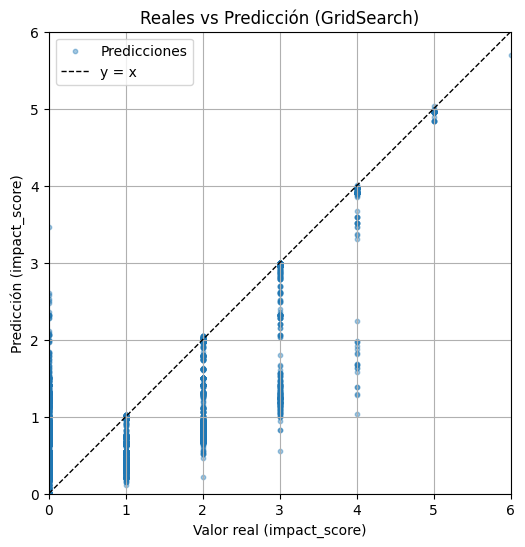

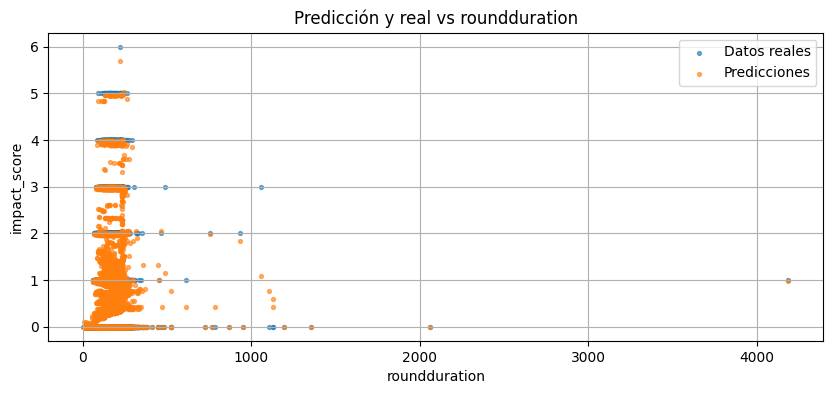

In [27]:
# Alinear y usando X e y originales
y_true = y.loc[X_test.index].to_numpy().reshape(-1)
y_pred_grid = best_model.predict(X_test_scaled).reshape(-1)

# Asegurar misma longitud
min_len = min(len(y_true), len(y_pred_grid))
y_true = y_true[:min_len]
y_pred_grid = y_pred_grid[:min_len]

# Gráfico: reales vs predicción
lims = (min(y_true.min(), y_pred_grid.min()), max(y_true.max(), y_pred_grid.max()))
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred_grid, alpha=0.4, s=10, color='tab:blue', label='Predicciones')
plt.plot(lims, lims, 'k--', linewidth=1, label='y = x')
plt.xlabel('Valor real (impact_score)')
plt.ylabel('Predicción (impact_score)')
plt.title('Reales vs Predicción (GridSearch)')
plt.legend()
plt.grid(True)
plt.xlim(lims); plt.ylim(lims)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Opcional: comparar frente a una característica de X (ej: 'roundduration' o 'nbkills')
feature = 'roundduration'  # cambiar por la columna de X que quieras visualizar
if feature in X_test.columns:
    x_feat = X_test[feature].to_numpy()[:min_len]
    plt.figure(figsize=(10, 4))
    plt.scatter(x_feat, y_true, s=8, alpha=0.6, label='Datos reales')
    plt.scatter(x_feat, y_pred_grid, s=8, alpha=0.6, label='Predicciones')
    plt.xlabel(feature)
    plt.ylabel('impact_score')
    plt.title(f'Predicción y real vs {feature}')
    plt.legend()
    plt.grid(True)
    plt.show()

